In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker as plticker
from matplotlib.gridspec import GridSpec


In [3]:
def set_size(width = 'neurips', fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'neurips':
        width_pt = 397.48499
    elif width == 'icml':
        width_pt = 234.8775
    elif width == 'cvpr':
        width_pt = 233.8583
    elif width == 'iccv':
        width_pt = 496.063
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2
    # golden_ratio = 0.8

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


# Using seaborn's style
width = 'iccv'


# Set the style to match scientific plotting conventions
plt.style.use('seaborn-v0_8-whitegrid')

# Configure global plot settings
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 10,
    'axes.linewidth': 1,
    'axes.labelsize': 10,
    'lines.linewidth': 1,
    'grid.linewidth': 0.5,
    'grid.alpha': 0.3,
    'xtick.major.width': 1,
    'ytick.major.width': 1,
    'xtick.direction': 'in',
    'ytick.direction': 'in'
})

markersize = 8


In [ ]:
data_dir = ""
save_dir = ""

filenames = ["FLASHmu_synthetic_testdata_predictions.pkl", "1cunet_synthetic_testdata_predictions.pkl",
             "svm1_synthetic_testset_predictions.pkl","svm2_synthetic_testset_predictions.pkl","svm3_synthetic_testset_predictions.pkl"]

colors = [ "#1E88E5", "#FFC107","#D81B60", "#004D40", "#6A1B9A", "#E64A19"]
color_svm = '#D81B60'
markers = ['-⚡', '-o', '-*', '-+']
alphas = [0.5, 0.3, 0.3]

[0]


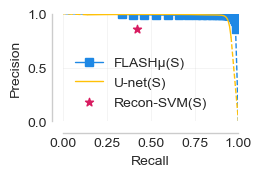

In [ ]:
fig = plt.figure(figsize=set_size('iccv', fraction=0.33, subplots=(1,1)))

markers = ['-s']+['-']*(len(filenames)-1)
alphas = [0.5, 0.3]
markersize = 3

labels = ['FLASHµ(S)','U-net(S)','Recon-SVM(S)','Recon-cnn']
label_svm = 'Recon-SVM(S)'
prec_svm = []
rec_svm = []

starter = 40
for i in range(len(filenames)):
    data = np.load(data_dir+filenames[i], allow_pickle=True)
    prec = data["precision"]
    rec = data["recall"]
    if i<2:
        plt.plot(rec[:-starter], prec[:-starter], markers[i] ,color = colors[i], label = labels[i])
        plt.plot([rec[-starter-1]]+[0], [prec[-starter-1]]+[1] ,color = colors[i], ls = '--')
        plt.plot([rec[0]]+[1], [prec[0]]+[0] ,color = colors[i], ls = '--')

    else:
        prec_svm.append(prec[0])
        rec_svm.append(rec[0])


svm_sorted_idx = np.argsort(rec_svm)
print(svm_sorted_idx)
rec_svm = np.array(rec_svm)[svm_sorted_idx]
prec_svm = np.array(prec_svm)[svm_sorted_idx]
plt.scatter(rec_svm, prec_svm, marker = '*' ,color = color_svm, label = label_svm)

plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.xlabel(rf"Recall")
plt.ylabel(r"Precision")
sns.despine(fig, trim=True, offset=8)


plt.savefig(save_dir+"_synthetic_testdata_precision_recall_.pdf", bbox_inches = 'tight', format = 'pdf')

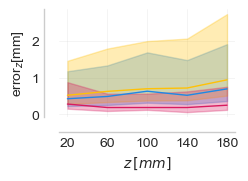

In [63]:
d_bins = [5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 13.5, 16.5, 23.5, 56.5, 83.5]
center_points_for_d_bins = [int((d_bins[i]+d_bins[i+1])/2) for i in range(len(d_bins)-1)]

fig, axes = plt.subplots(1,1, figsize=set_size('iccv', 0.33, (1,1)))

z_bins = np.linspace(0,200,6)
center_points_for_z_bins = [int((z_bins[i]+z_bins[i+1])/2) for i in range(len(z_bins)-1)]

for i,file in enumerate(filenames[:3]):
    data = np.load(data_dir+file, allow_pickle=True)
    z_det = data["z_detected"]
    z_pred = data["z_predicted"]
    ez = np.abs(z_det - z_pred)
    d_det = data["d_detected"]
    d_pred = data["d_predicted"]
    ed = np.abs(d_det - d_pred)

    z_total = data["z_all_in_gt"]
    d_total = data["d_all_in_gt"]


    z_bin_indices = np.digitize(z_det, bins = z_bins)
    # ezz_mean = np.array([np.mean(ez[z_bin_indices == i]) for i in range(1, len(z_bins))])
    # ezz_std = np.array([np.std(ez[z_bin_indices == i])/np.sqrt(sum(z_bin_indices==i)) for i in range(1, len(z_bins))])

    ezz_mean = np.array([np.median(ez[z_bin_indices == i]) for i in range(1, len(z_bins))])
    ezz_std_high = np.array([np.quantile(ez[z_bin_indices == i], 0.75) for i in range(1, len(z_bins))])
    ezz_std_low = np.array([np.quantile(ez[z_bin_indices == i], 0.25) for i in range(1, len(z_bins))])


    # edz_mean = np.array([np.mean(ed[z_bin_indices == i]) for i in range(1, len(z_bins))])
    # edz_std = np.array([np.std(ed[z_bin_indices == i])/np.sqrt(sum(z_bin_indices==i)) for i in range(1, len(z_bins))])

    edz_mean = np.array([np.median(ed[z_bin_indices == i]) for i in range(1, len(z_bins))])
    edz_std_high = np.array([np.quantile(ed[z_bin_indices == i], 0.75) for i in range(1, len(z_bins))])
    edz_std_low = np.array([np.quantile(ed[z_bin_indices == i], 0.25) for i in range(1, len(z_bins))])


    axes.plot(center_points_for_z_bins, ezz_mean, color = colors[i],)
    axes.fill_between(center_points_for_z_bins, ezz_mean-ezz_std_low, ezz_mean+ezz_std_high, color=colors[i], alpha=0.3)

axes.set_xticks(center_points_for_z_bins)
axes.set_xlabel(rf"$z\,[mm]$")
axes.set_ylabel(r"error$_z$[mm]")

sns.despine(offset=11)



plt.savefig(save_dir+"_synthetic_testdata_ezz_.pdf", bbox_inches = 'tight', format = 'pdf')

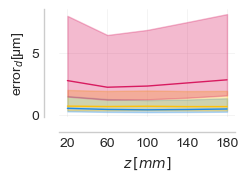

In [64]:
d_bins = [5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 13.5, 16.5, 23.5, 56.5, 83.5]
center_points_for_d_bins = [int((d_bins[i]+d_bins[i+1])/2) for i in range(len(d_bins)-1)]

fig, axes = plt.subplots(1,1, figsize=set_size('iccv', 0.33, (1,1)))

z_bins = np.linspace(0,200,6)
center_points_for_z_bins = [int((z_bins[i]+z_bins[i+1])/2) for i in range(len(z_bins)-1)]

for i,file in enumerate(filenames[:3]):
    data = np.load(data_dir+file, allow_pickle=True)
    z_det = data["z_detected"]
    z_pred = data["z_predicted"]
    ez = np.abs(z_det - z_pred)
    d_det = data["d_detected"]
    d_pred = data["d_predicted"]
    ed = np.abs(d_det - d_pred)

    z_total = data["z_all_in_gt"]
    d_total = data["d_all_in_gt"]


    z_bin_indices = np.digitize(z_det, bins = z_bins)
    ezz_mean = np.array([np.median(ez[z_bin_indices == i]) for i in range(1, len(z_bins))])
    ezz_std_high = np.array([np.quantile(ez[z_bin_indices == i], 0.75) for i in range(1, len(z_bins))])
    ezz_std_low = np.array([np.quantile(ez[z_bin_indices == i], 0.25) for i in range(1, len(z_bins))])


    # edz_mean = np.array([np.mean(ed[z_bin_indices == i]) for i in range(1, len(z_bins))])
    # edz_std = np.array([np.std(ed[z_bin_indices == i])/np.sqrt(sum(z_bin_indices==i)) for i in range(1, len(z_bins))])

    edz_mean = np.array([np.median(ed[z_bin_indices == i]) for i in range(1, len(z_bins))])
    edz_std_high = np.array([np.quantile(ed[z_bin_indices == i], 0.75) for i in range(1, len(z_bins))])
    edz_std_low = np.array([np.quantile(ed[z_bin_indices == i], 0.25) for i in range(1, len(z_bins))])


    axes.plot(center_points_for_z_bins, edz_mean, color = colors[i],)
    axes.fill_between(center_points_for_z_bins, edz_mean-edz_std_low, edz_mean+edz_std_high, color=colors[i], alpha=0.3)

sns.despine()
axes.set_xticks(center_points_for_z_bins)
axes.set_xlabel(rf"$z\,[mm]$")
axes.set_ylabel(r"error$_d$[µm]")
sns.despine(offset=11)

plt.savefig(save_dir+"_synthetic_testdata_edz_.pdf", bbox_inches = 'tight', format = 'pdf')


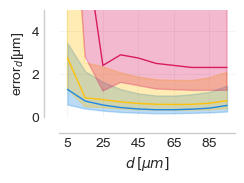

In [76]:
d_bins = [5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 13.5, 16.5, 23.5, 56.5, 83.5]
d_bins = np.linspace(0,100,11)
center_points_for_d_bins = [int((d_bins[i]+d_bins[i+1])/2) for i in range(len(d_bins)-1)]

fig, axes = plt.subplots(1,1, figsize=set_size('iccv', 0.33, (1,1)))
z_bins = np.linspace(5,200,6)
center_points_for_z_bins = [int((z_bins[i]+z_bins[i+1])/2) for i in range(len(z_bins)-1)]

for i,file in enumerate(filenames[:3]):
    data = np.load(data_dir+file, allow_pickle=True)
    z_det = data["z_detected"]
    z_pred = data["z_predicted"]
    ez = np.abs(z_det - z_pred)
    d_det = data["d_detected"]
    d_pred = data["d_predicted"]
    ed = np.abs(d_det - d_pred)

    z_total = data["z_all_in_gt"]
    d_total = data["d_all_in_gt"]


    d_bin_indices = np.digitize(d_det, bins = d_bins)
    # ezd_mean = np.array([np.mean(ed[d_bin_indices == i]) for i in range(1, len(d_bins))])
    # ezd_std = np.array([np.std(ed[d_bin_indices == i])/np.sqrt(sum(d_bin_indices==i)) for i in range(1, len(d_bins))])

    ezd_mean = np.array([np.median(ez[d_bin_indices == i]) for i in range(1, len(d_bins))])
    ezd_std_low = np.array([np.quantile(ez[d_bin_indices == i], 0.25) for i in range(1, len(d_bins))])
    ezd_std_high = np.array([np.quantile(ez[d_bin_indices == i], 0.75) for i in range(1, len(d_bins))])

    # edd_mean = np.array([np.mean(ed[d_bin_indices == i]) for i in range(1, len(d_bins))])
    # edd_std = np.array([np.std(ed[d_bin_indices == i])/np.sqrt(sum(d_bin_indices==i)) for i in range(1, len(d_bins))])

    edd_mean = np.array([np.median(ed[d_bin_indices == i]) for i in range(1, len(d_bins))])
    edd_std_low = np.array([np.quantile(ed[d_bin_indices == i], 0.25) for i in range(1, len(d_bins))])
    edd_std_high = np.array([np.quantile(ed[d_bin_indices == i], 0.75) for i in range(1, len(d_bins))])

    axes.plot(center_points_for_d_bins, edd_mean, color = colors[i])
    axes.fill_between(center_points_for_d_bins, edd_mean-edd_std_low, edd_mean+edd_std_high, color=colors[i], alpha=0.3)

axes.set_xticks(center_points_for_d_bins[::2])
axes.set_xlabel(rf"$d\,[µm]$")
axes.set_ylabel(r"error$_d$[µm]")

axes.set_ylim(0,5)
sns.despine(offset=11)

plt.savefig(save_dir+"_synthetic_testdata_edd_.pdf", bbox_inches = 'tight', format = 'pdf')

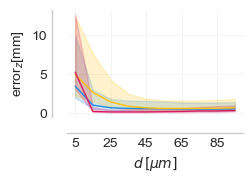

In [66]:
d_bins = [5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 13.5, 16.5, 23.5, 56.5, 83.5]
d_bins = np.linspace(0,100,11)
center_points_for_d_bins = [int((d_bins[i]+d_bins[i+1])/2) for i in range(len(d_bins)-1)]
fig, axes = plt.subplots(1,1, figsize=set_size('iccv', 0.33, (1,1)))

z_bins = np.linspace(5,200,6)
center_points_for_z_bins = [int((z_bins[i]+z_bins[i+1])/2) for i in range(len(z_bins)-1)]

for i,file in enumerate(filenames[:3]):
    data = np.load(data_dir+file, allow_pickle=True)
    z_det = data["z_detected"]
    z_pred = data["z_predicted"]
    ez = np.abs(z_det - z_pred)
    d_det = data["d_detected"]
    d_pred = data["d_predicted"]
    ed = np.abs(d_det - d_pred)

    z_total = data["z_all_in_gt"]
    d_total = data["d_all_in_gt"]


    d_bin_indices = np.digitize(d_det, bins = d_bins)
    # ezd_mean = np.array([np.mean(ed[d_bin_indices == i]) for i in range(1, len(d_bins))])
    # ezd_std = np.array([np.std(ed[d_bin_indices == i])/np.sqrt(sum(d_bin_indices==i)) for i in range(1, len(d_bins))])

    ezd_mean = np.array([np.median(ez[d_bin_indices == i]) for i in range(1, len(d_bins))])
    ezd_std_low = np.array([np.quantile(ez[d_bin_indices == i], 0.25) for i in range(1, len(d_bins))])
    ezd_std_high = np.array([np.quantile(ez[d_bin_indices == i], 0.75) for i in range(1, len(d_bins))])

    # edd_mean = np.array([np.mean(ed[d_bin_indices == i]) for i in range(1, len(d_bins))])
    # edd_std = np.array([np.std(ed[d_bin_indices == i])/np.sqrt(sum(d_bin_indices==i)) for i in range(1, len(d_bins))])

    edd_mean = np.array([np.median(ed[d_bin_indices == i]) for i in range(1, len(d_bins))])
    edd_std_low = np.array([np.quantile(ed[d_bin_indices == i], 0.25) for i in range(1, len(d_bins))])
    edd_std_high = np.array([np.quantile(ed[d_bin_indices == i], 0.75) for i in range(1, len(d_bins))])

    axes.plot(center_points_for_d_bins, ezd_mean, color = colors[i])
    axes.fill_between(center_points_for_d_bins, ezd_mean-ezd_std_low, ezd_mean+ezd_std_high, color=colors[i], alpha=0.2)

axes.set_xticks(center_points_for_d_bins[::2])
axes.set_xlabel(rf"$d\,[µm]$")
axes.set_ylabel(r"error$_z$[mm]")

sns.despine(offset=11)

plt.savefig(save_dir+"_synthetic_testdata_ezd_.pdf", bbox_inches = 'tight', format = 'pdf')

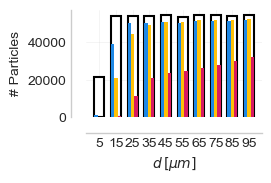

In [46]:
# d_bins = [5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 13.5, 16.5, 23.5, 56.5, 83.5]
d_bins = np.linspace(0,100,11)
center_points_for_d_bins = [int((d_bins[i]+d_bins[i+1])/2) for i in range(len(d_bins)-1)]
fig, axes = plt.subplots(1,1, figsize=set_size('iccv', 0.33, (1,1)))

width = 0.2  # the width of the bars
multiplier = 0

z_bins = np.linspace(5,200,5)
center_points_for_z_bins = [int((z_bins[i]+z_bins[i+1])/2) for i in range(len(z_bins)-1)]

for i,file in enumerate(filenames[:3]):
    offset = width * multiplier
    data = np.load(data_dir+file, allow_pickle=True)
    z_det = data["z_detected"]
    z_pred = data["z_predicted"]
    ez = np.abs(z_det - z_pred)
    d_det = data["d_detected"]
    d_pred = data["d_predicted"]
    ed = np.abs(d_det - d_pred)

    z_total = data["z_all_in_gt"]
    d_total = data["d_all_in_gt"]



    if i == 0:
        hist, bin_centers = np.histogram(d_total, d_bins)
        tmp_range = np.arange(0,len(hist))  
        axes.bar(tmp_range, hist, width = 0.6, color = 'white', edgecolor = 'black', label = 'GT', linewidth = 1.5)     
    
    hist, bin_centers = np.histogram(d_det, d_bins)
    tmp_range = np.arange(0,len(hist))
    
    axes.bar(tmp_range+offset-width, hist, width, alpha = 1, label = labels[i], color = colors[i])
    multiplier += 1 

axes.set_xticks(tmp_range)
axes.set_xticklabels(center_points_for_d_bins[:])
axes.set_xlabel(rf"$d\,[µm]$")
axes.set_ylabel(r"# Particles")

sns.despine(offset=11)

plt.savefig(save_dir+"_synthetic_testdata_histr_.pdf", bbox_inches = 'tight', format = 'pdf')

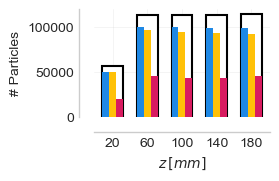

In [68]:
# d_bins = [5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 13.5, 16.5, 23.5, 56.5, 83.5]
d_bins = np.linspace(0,100,11)
center_points_for_d_bins = [int((d_bins[i]+d_bins[i+1])/2) for i in range(len(d_bins)-1)]

# fig, axes = plt.subplots(1,1, figsize=(4*1, 4*1))
fig, axes = plt.subplots(1,1, figsize=set_size('iccv', 0.33, (1,1)))
width = 0.2  # the width of the bars
multiplier = 0

z_bins = np.linspace(0,200,6)
center_points_for_z_bins = [int((z_bins[i]+z_bins[i+1])/2) for i in range(len(z_bins)-1)]

for i,file in enumerate(filenames[:3]):
    offset = width * multiplier
    data = np.load(data_dir+file, allow_pickle=True)
    z_det = data["z_detected"]
    z_pred = data["z_predicted"]
    ez = np.abs(z_det - z_pred)
    d_det = data["d_detected"]
    d_pred = data["d_predicted"]
    ed = np.abs(d_det - d_pred)

    z_total = data["z_all_in_gt"]
    d_total = data["d_all_in_gt"]



    if i == 0:
        hist, bin_centers = np.histogram(z_total, z_bins)
        tmp_range = np.arange(0,len(hist))  
        axes.bar(tmp_range, hist, width = 0.6, color = 'white', edgecolor = 'black', label = 'GT', linewidth = 1.5)     
    
    hist, bin_centers = np.histogram(z_det, z_bins)
    tmp_range = np.arange(0,len(hist))
    
    axes.bar(tmp_range+offset-width, hist, width, alpha = 1, label = labels[i], color = colors[i])
    multiplier += 1 

axes.set_xticks(tmp_range)
axes.set_xticklabels(center_points_for_z_bins[:])
axes.set_xlabel(rf"$z\,[mm]$")
axes.set_ylabel(r"# Particles")

sns.despine(offset=11)

plt.savefig(save_dir+"_synthetic_testdata_histz_.pdf", bbox_inches = 'tight', format = 'pdf')

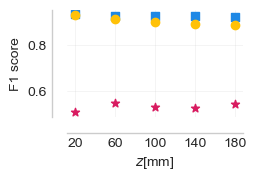

In [71]:
# d_bins = [5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 13.5, 16.5, 23.5, 56.5, 83.5]
d_bins = np.linspace(0,100,11)
center_points_for_d_bins = [int((d_bins[i]+d_bins[i+1])/2) for i in range(len(d_bins)-1)]

# fig, axes = plt.subplots(1,1, figsize=(4*1, 4*1))
fig, axes = plt.subplots(1,1, figsize=set_size('iccv', 0.33, (1,1)))
width = 0.2  # the width of the bars
multiplier = 0

markers = ['s', 'o', '*', '+']

z_bins = np.linspace(0,200,6)
center_points_for_z_bins = [int((z_bins[i]+z_bins[i+1])/2) for i in range(len(z_bins)-1)]

for i,file in enumerate(filenames[:3]):
    offset = width * multiplier
    data = np.load(data_dir+file, allow_pickle=True)
    z_det = data["z_detected"]
    z_pred = data["z_predicted"]
    ez = np.abs(z_det - z_pred)
    d_det = data["d_detected"]
    d_pred = data["d_predicted"]
    ed = np.abs(d_det - d_pred)

    z_total = data["z_all_in_gt"]
    d_total = data["d_all_in_gt"]

    prec = data["precision_at_best_f1"]


    if i == 0:
        hist_true, bin_centers = np.histogram(z_total, z_bins)
        tmp_range = np.arange(0,len(hist))  
        # axes.bar(tmp_range, hist, width = 0.6, color = 'white', edgecolor = 'black', label = 'GT', linewidth = 1.5)     
    
    hist, bin_centers = np.histogram(z_det, z_bins)
    tmp_range = np.arange(0,len(hist))
    
    axes.scatter(tmp_range, 2*(hist/hist_true)*prec/((hist/hist_true)+prec), marker = markers[i] ,alpha = 1, label = labels[i], color = colors[i])
    multiplier += 1 

axes.set_xticks(tmp_range)
axes.set_xticklabels(center_points_for_z_bins[:])
axes.set_xlabel(rf"$z$[mm]")
axes.set_ylabel(r"F1 score")

sns.despine(offset=11)

plt.savefig(save_dir+"_synthetic_testdata_f1z_.pdf", bbox_inches = 'tight', format = 'pdf')

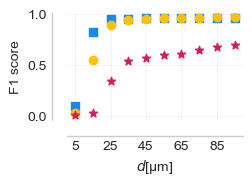

In [74]:
# d_bins = [5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 13.5, 16.5, 23.5, 56.5, 83.5]
d_bins = np.linspace(0,100,11)
center_points_for_d_bins = [int((d_bins[i]+d_bins[i+1])/2) for i in range(len(d_bins)-1)]

# fig, axes = plt.subplots(1,1, figsize=(4*1, 4*1))
fig, axes = plt.subplots(1,1, figsize=set_size('iccv', 0.33, (1,1)))

width = 0.2  # the width of the bars
multiplier = 0

markers = ['s', 'o', '*', '+']

z_bins = np.linspace(0,200,6)
center_points_for_z_bins = [int((z_bins[i]+z_bins[i+1])/2) for i in range(len(z_bins)-1)]

for i,file in enumerate(filenames[:3]):
    offset = width * multiplier
    data = np.load(data_dir+file, allow_pickle=True)
    z_det = data["z_detected"]
    z_pred = data["z_predicted"]
    ez = np.abs(z_det - z_pred)
    d_det = data["d_detected"]
    d_pred = data["d_predicted"]
    ed = np.abs(d_det - d_pred)

    z_total = data["z_all_in_gt"]
    d_total = data["d_all_in_gt"]

    prec = data["precision_at_best_f1"]


    if i == 0:
        hist_true, bin_centers = np.histogram(d_total, d_bins)
        tmp_range = np.arange(0,len(hist))  
        # axes.bar(tmp_range, hist, width = 0.6, color = 'white', edgecolor = 'black', label = 'GT', linewidth = 1.5)     
    
    hist, bin_centers = np.histogram(d_det, d_bins)
    tmp_range = np.arange(0,len(hist))
    
    axes.scatter(tmp_range, 2*(hist/hist_true)*prec/((hist/hist_true)+prec), marker = markers[i], alpha = 1, label = labels[i], color = colors[i])
    multiplier += 1 

axes.set_xticks(tmp_range[::2])
axes.set_xticklabels(center_points_for_d_bins[::2])
axes.set_xlabel(rf"$d$[µm]")
axes.set_ylabel(r"F1 score")

sns.despine(offset=11)

plt.savefig(save_dir+"_synthetic_testdata_f1r_.pdf", bbox_inches = 'tight', format = 'pdf')

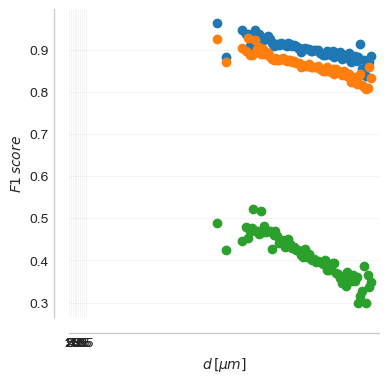

In [50]:
# d_bins = [5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 13.5, 16.5, 23.5, 56.5, 83.5]
d_bins = np.linspace(0,100,11)
center_points_for_d_bins = [int((d_bins[i]+d_bins[i+1])/2) for i in range(len(d_bins)-1)]

fig, axes = plt.subplots(1,1, figsize=(4*1, 4*1))
# fig, axes = plt.subplots(1,1, figsize=set_size('iccv', 0.33, (1,1)))
width = 0.2  # the width of the bars
multiplier = 0

markers = ['s', 'o', '*', '+']

z_bins = np.linspace(0,200,6)
center_points_for_z_bins = [int((z_bins[i]+z_bins[i+1])/2) for i in range(len(z_bins)-1)]

for i,file in enumerate(filenames[:3]):
    
    data = np.load(data_dir+file, allow_pickle=True)
    pnums = np.array([key for key in data["recall_per_pnum"]])
    sorted_idx = np.argsort(pnums)
    recall = np.array([data["recall_per_pnum"][pnum] for pnum in data["recall_per_pnum"]])[sorted_idx]
    pnums = pnums[sorted_idx]
    plt.scatter(pnums, recall)
    

    
axes.set_xticks(tmp_range)
axes.set_xticklabels(center_points_for_d_bins[:])
axes.set_xlabel(rf"$d\,[µm]$")
axes.set_ylabel(r"$F1\,score$")

sns.despine(offset=11)

# plt.savefig(save_dir+"_synthetic_testdata_f1r_.pdf", bbox_inches = 'tight', format = 'pdf')

[ 80  85  94  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164]
[ 80  85  94  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164]
[ 80.  85.  94.  96.  97.  98.  99. 100. 101. 102. 103. 104. 105. 106.
 107. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118. 119. 120.
 121. 122. 123. 124. 125. 126. 127. 128. 129. 130. 131. 132. 133. 134.
 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145. 146. 147. 148.
 149. 150. 151. 152. 153. 154. 155. 156. 157. 158. 159. 160. 161. 162.
 163. 164.]


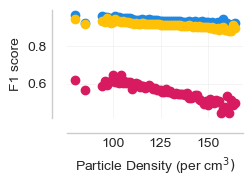

In [75]:
filenames = ["FLASHmu_synthetic_testdata_predictions.pkl","1cunet_synthetic_testdata_predictions.pkl","svm1_synthetic_testset_predictions.pkl"]
# fig, axes = plt.subplots(1,1, figsize=(4*1, 4*1))
fig, axes = plt.subplots(1,1, figsize=set_size('iccv', 0.33, (1,1)))
for i,file in enumerate(filenames):
    data = np.load(data_dir+file, allow_pickle=True)
    pnums = np.array([key for key in data["recall_per_pnum"]])
    sorted_idx = np.argsort(pnums)
    recall = np.array([data["recall_per_pnum"][pnum] for pnum in data["recall_per_pnum"]])[sorted_idx]
    pnums = pnums[sorted_idx]
    prec = data["precision_at_best_f1"]
    print(pnums)
    plt.scatter(pnums, 2*(recall*prec)/(recall+prec), color = colors[i])


axes.set_xlabel(r"Particle Density (per cm$^3)$")
axes.set_ylabel(r"F1 score")

sns.despine(offset=11)

plt.savefig(save_dir+"_synthetic_testdata_f1pnum_.pdf", bbox_inches = 'tight', format = 'pdf')